In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\CNP\CNP_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2
0,-0.45866,-1.235200
1,0.24348,-0.873130
2,0.25071,-0.808030
3,0.21462,-0.951980
4,0.12829,-1.031400
...,...,...
3995,0.89265,0.278030
3996,0.74741,NaN
3997,1.07660,0.085708
3998,NaN,0.351420


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	200
float64		column 2	200


In [4]:
df.describe()

,column 1,column 2
count,3800.000000,3800.000000
mean,0.003910,0.005332
std,0.719338,0.718639
min,-1.714600,-1.376500
25%,-0.483847,-0.503308
50%,0.010157,0.004464
75%,0.516685,0.520205
max,1.363900,1.344400


<AxesSubplot:>

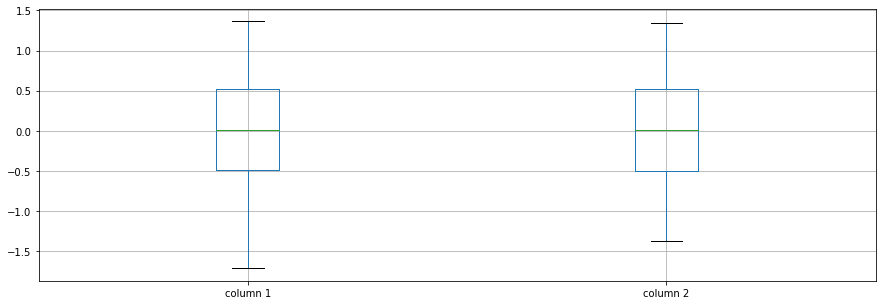

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.003910
column 2    0.005332
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2
column 1,1.000000,0.001077
column 2,0.001077,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [2,2+12,2+12+12,2+12+12+12,2+12+12+12+12,2+12+12+12+12+12,2+12+12+12+12+12+12,2+12+12+12+12+12,2+12+12+12+12,2+12+12+12,2+12+12,2+12,2], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 1.3534963340759278
Epoch: 1 , loss: 1.3552447652816773
Epoch: 2 , loss: 1.3549524779319764
Epoch: 3 , loss: 1.353313323020935
Epoch: 4 , loss: 1.3539745416641236
Epoch: 5 , loss: 1.3536904850006104
Epoch: 6 , loss: 1.3537968368530273
Epoch: 7 , loss: 1.354088327884674
Epoch: 8 , loss: 1.3541257729530334
Epoch: 9 , loss: 1.3533362073898316
Epoch: 10 , loss: 1.3537808136940002
Epoch: 11 , loss: 1.3558272705078125
Epoch: 12 , loss: 1.35594988155365
Epoch: 13 , loss: 1.3544275522232057
Epoch: 14 , loss: 1.3537297639846801
Epoch: 15 , loss: 1.355579261779785
Epoch: 16 , loss: 1.3534228110313415
Epoch: 17 , loss: 1.3540525012016296
Epoch: 18 , loss: 1.353838343143463
Epoch: 19 , loss: 1.3533139629364013
Epoch: 20 , loss: 1.3550717449188232
Epoch: 21 , loss: 1.3520500960350037
Epoch: 22 , loss: 1.354109607219696
Epoch: 23 , loss: 1.3529662284851074
Epoch: 24 , loss: 1.35313285779953
Epoch: 25 , loss: 1.3519179

In [21]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4000, 2)

In [22]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.005165
column 2   -1.258200
Name: 21, dtype: float64

In [23]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\CNP.xlsx', header=None,names=column_names)

In [24]:
new_df-complete_df

,column 1,column 2
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
3995,0.000000,0.000000
3996,0.000000,-0.427009
3997,0.000000,0.000000
3998,-0.698735,0.000000


Calculating NRMSE Value

In [25]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [26]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [27]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(16.98225831182931, 64.9340549279942)

In [28]:
NRMS=numerator/denominator
NRMS


0.2615308458814261

In [29]:
new_df.iloc[66,:]

column 1    0.12305
column 2   -1.03610
Name: 66, dtype: float64

In [30]:
imputations[-1]


,column 1,column 2
0,-0.458660,-1.235200
1,0.243480,-0.873130
2,0.250710,-0.808030
3,0.214620,-0.951980
4,0.128290,-1.031400
...,...,...
3995,0.892650,0.278030
3996,0.747410,0.001521
3997,1.076600,0.085708
3998,0.005145,0.351420


In [20]:
imputations[-1].to_excel("CNP_NE_5(imp).xlsx", index=False, header=False)